# Анализ бизнес-показателей Яндекс.Афиши

Необходимо помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет.

Есть данные Яндекс.Афиши с июня 2017 по конец мая 2018 года:
* лог сервера с данными о посещениях сайта Яндекс.Афиши,
* выгрузка всех заказов за этот период,
* статистика рекламных расходов.

Необходимо изучить:
* как клиенты пользуются сервисом,
* когда делают первые покупки на сайте,
* сколько денег приносит компании каждый клиент,
* когда расходы на привлечение клиента окупаются.

Выручка измеряется в условных единицах — у.е.

**План работы**

**Шаг 1. Загрузить данные и подготовить их к анализу**

1.1. Положить данные о визитах, заказах и рекламных расходах в переменные;  
1.2. Подготовить данные. Убедиться, что тип данных во всех колонках соответствует сохранённым в них значениям.

**Шаг 2. Рассчитать метрики и постройть графики**

Посчитать метрики трёх видов:
* продуктовые,
* метрики электронной коммерции,
* маркетинговые.
Отобразить на графиках изменения каждой метрики во времени.
После каждого пункта сформулировать выводы.

2.1. Продуктовые метрики  
2.1.1. Рассчитать DAU, WAU и MAU. Вычислить средние значения этих метрик за весь период;  
2.1.2. Определить, сколько раз за день пользователи в среднем заходят на сайт;  
2.1.3. Исследовать, сколько времени пользователи проводят на сайте. Узнать продолжительность типичной пользовательской сессии за весь период. Чтобы выбрать подходящую среднюю меру, построить график распределения. Изменение продолжительности сессий во времени изучать необязательно;  
2.1.4. Рассчитать Retention Rate, применяя когортный анализ. Найти средний Retention Rate на второй месяц «жизни» когорт.  
2.2. Метрики электронной коммерции  
2.2.1. Исследовать, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки. Изучать изменение этой метрики во времени необязательно;  
2.2.2. Применяя когортный анализ или другой метод, рассчитать среднее количество покупок на одного покупателя за определённый период, например за 6 месяцев. Изучать изменение этой метрики во времени необязательно;  
2.2.3. Рассчитать средний чек;  
2.2.4. Выяснить, как меняется во времени LTV на покупателя по когортам. Помнить, что LTV — накопительная метрика. Рассчитайть средний LTV по когортам за 6 месяцев; в расчёт включить когорты, «прожившие» не менее 6 месяцев. Маржинальность сервиса — 100%.  
2.3. Маркетинговые метрики  
Посчитать и отобразить на графиках, как маркетинговые метрики различаются по рекламным источникам.
Один и тот же пользователь мог заходить на сайт из нескольких источников, поэтому важно определить «главный» источник для каждого и учитывать это в расчётах. Например, главным может стать первый источник перехода.  
2.3.1. Посчитать общую сумму расходов на маркетинг. Выяснить, как траты распределены по источникам;  
2.3.2. Рассчитать средний CAC на одного покупателя для всего проекта и для каждого источника трафика;  
2.3.3. Рассчитать ROMI по когортам в разрезе источников. Сравнить окупаемость за одинаковые периоды жизни когорт. Обратить внимание, что клиенты, пришедшие из разных источников, могут иметь разный LTV.

**Шаг 3. Сформулировать выводы и рекомендации**  

3.1. Определить источники трафика, на которые маркетологам стоит делать упор. Объяснить свой выбор: на какие метрики ориентируетесь и почему;  
3.2. Описать выводы, которые сделаны после подсчёта метрик каждого вида: маркетинговых, продуктовых и метрик электронной коммерции;  
3.3. Подвести итоги когортного анализа. Определить самые перспективные для компании когорты клиентов.

## Загрузка данных и подготовка их к анализу

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

Сохраним данные в переменные.

In [2]:
sessions = pd.read_csv(r'C:\\dataset_praktikum/visits_log.csv') # визиты
orders = pd.read_csv(r'C:\\dataset_praktikum/orders_log.csv') # заказы
expenses = pd.read_csv(r'C:\\dataset_praktikum/costss.csv') # расходы

Изучим данные.

Рассмотрим таблицу sessions.

In [3]:
sessions.head() # вывод на экран (первые и последние 5 строк таблицы)

Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168

In [4]:
sessions.info() # общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


Скорректируем названия столбцов, изменим тип данных в столбцах с датами.

In [5]:
sessions.columns = sessions.columns.str.lower() # приведение названия столбцов к нижнему регистру

# переименование столбцов
sessions.rename(columns = {'end ts':'end_ts', 'source id':'source_id',

                              'start ts':'start_ts'}, inplace = True)

In [6]:
# изменение типа данных
sessions['end_ts'] = pd.to_datetime(sessions['end_ts'])
sessions['start_ts'] = pd.to_datetime(sessions['start_ts'])

In [7]:
sessions.duplicated().sum() # проверка на дубликаты

0

Рассмотрим таблицу orders.

In [8]:
orders.head() # вывод на экран (первые и последние 5 строк таблицы)

Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450

In [9]:
orders.info() # общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


Скорректируем названия столбцов, изменим тип данных в столбце с датой.

In [10]:
orders.columns = orders.columns.str.lower() # приведение названия столбцов к нижнему регистру

# переименование столбца
orders.rename(columns = {'buy ts':'buy_ts'}, inplace = True)

In [11]:
# изменение типа данных
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

In [12]:
orders.duplicated().sum() # проверка на дубликаты

0

Рассмотрим таблицу expenses.

In [13]:
expenses.head() # вывод на экран (первые и последние 5 строк таблицы)

source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08

In [14]:
expenses.info() # общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


Изменим тип данных в столбце с датой.

In [15]:
# изменение типа данных
expenses['dt'] = pd.to_datetime(expenses['dt'])

In [16]:
expenses.duplicated().sum() # проверка на дубликаты

0

Проверим данные на логику. Быть может есть записи, когда start_ts > end_ts или revenue <=0.

In [17]:
sessions.query('start_ts > end_ts')

device              end_ts  source_id            start_ts  \
4181    desktop 2018-03-25 03:18:00          3 2018-03-25 03:50:00   
177972  desktop 2018-03-25 03:09:00          9 2018-03-25 03:55:00   

                         uid  
4181    13092152539246794986  
177972   4621202742905035453

В записях времени начала и окончания сессии ошибка, удалим эти две строки.

In [18]:
sessions = sessions.drop(index=[4181, 177972])

In [19]:
orders.query('revenue <= 0').head()

buy_ts  revenue                   uid
1802 2017-06-22 18:19:00      0.0  17030528792926543083
2787 2017-07-07 15:54:00      0.0  10281425020415612933
4783 2017-08-02 14:54:00      0.0    184148767273119549
5095 2017-08-09 14:48:00      0.0   5603453646174104178
5863 2017-08-23 13:43:00      0.0   5603453646174104178

Отрицательных значений нет, но есть нулевые. Возможно это заказы за бонусы, оствим их без изменений.

**Вывод по Шагу 1**

На данном этапе была проведена предварительная обработка данных:
* скорректированы названия столбцов,
* изменен тип данных у столбцов с датами,
* данные проверены на дубликаты и пропуски (не обнаружено),  
* в записях времени начала и окончания сессии обнаружены две ошибки (когда start_ts > end_ts), необходимо выяснить причины появления данных ошибок.

## Рассчёт метрик и постройка графиков

### Продуктовые метрики

#### Рассчитаем DAU, WAU и MAU. Вычислим средние значения этих метрик за весь период.

DAU (от англ. daily active users) — количество уникальных пользователей в день;  
WAU (от англ. weekly active users) — количество уникальных пользователей в неделю;  
MAU (от англ. monthly active users) — количество уникальных пользователей в месяц.  

Чтобы посчитать недельное и месячное использование, выделим в отдельные столбцы год, месяц и неделю, а также полную дату.

In [20]:
sessions['session_week_new'] = (pd.to_datetime(
    sessions['start_ts'], unit='d'
) - pd.to_timedelta(sessions['start_ts'].dt.dayofweek, unit='d')).dt.date
# от даты отнимаем порядковый номер недели, получаем начала недели с понедельника

In [21]:
sessions['session_year']  = sessions['start_ts'].dt.year
sessions['session_month'] = sessions['start_ts'].astype('datetime64[M]')
sessions['session_week']  = sessions['start_ts'].astype('datetime64[W]')
sessions['session_day'] = sessions['start_ts'].dt.date

In [22]:
sessions.head()

device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid session_week_new  session_year session_month  \
0  16879256277535980062       2017-12-18          2017    2017-12-01   
1    104060357244891740       2018-02-19          2018    2018-02-01   
2   7459035603376831527       2017-06-26          2017    2017-07-01   
3  16174680259334210214       2018-05-14          2018    2018-05-01   
4   9969694820036681168       2017-12-25          2017    2017-12-01   

  session_week session_day  
0   2017-12-14  2017-12-20  
1   2018-02-15  2018-02-19  
2   2017-06-29  2017-07-01  
3   2018-05-17  2018-05-20  
4   2017-12-21  2017-12-27

Посчитаем метрики и построим графики. Сгруппируем данные по уникальным пользователям и найдём среднее:

dau_total_mean = 907


wau_total_mean = 5724


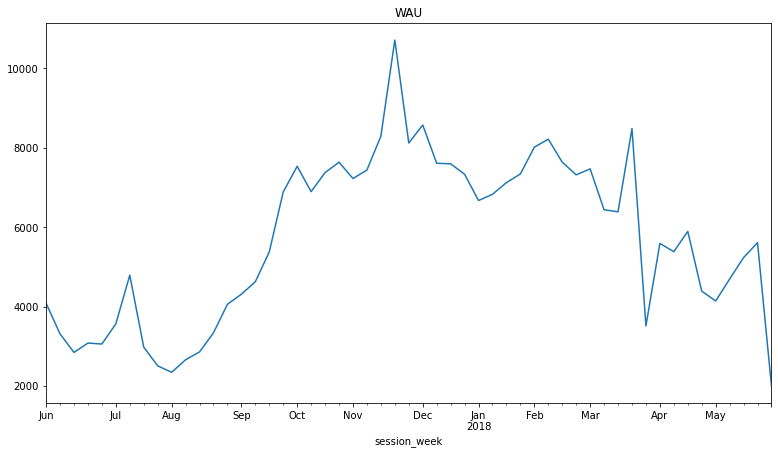

mau_total_mean = 23228


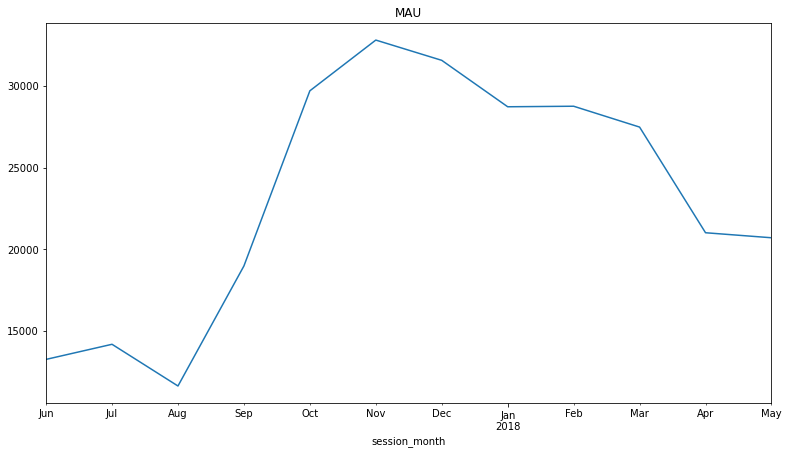

In [23]:
dau_total = sessions.groupby('session_day')['uid'].nunique()
wau_total = sessions.groupby('session_week')['uid'].nunique()
mau_total = sessions.groupby('session_month')['uid'].nunique()
print('dau_total_mean =', int(dau_total.mean()))
px.line(dau_total.to_frame().reset_index(), x='session_day', y = 'uid', title='DAU').show()
print('wau_total_mean =', int(wau_total.mean()))
wau_total.plot(figsize=(13, 7))
plt.title('WAU')
plt.show()
print('mau_total_mean =', int(mau_total.mean()))
mau_total.plot(figsize=(13, 7))
plt.title('MAU')
plt.show()

Среднее количество уникальных пользователей в день (dau) - 907.  
Среднее количество уникальных пользователей в неделю (wau) - 5716.  
Среднее количество уникальных пользователей в месяц (mau) -23228.  
Необходимо обратить внимание на 24.11.2017 (пик по пользователям за день) и 31.03.2018 (всего один пользователь).

#### Определим, сколько раз за день пользователи в среднем заходят на сайт.

In [24]:
# группировка по дате и подсчет количества сессий и уникальных пользователей
sessions_per_user = sessions.groupby('session_day').agg({'uid': ['count','nunique']})

In [25]:
sessions_per_user.columns = ['n_sessions', 'n_users'] # переименование столбцов

Разделим число сессий на количество пользователей за период и вычислим среднее.

In [26]:
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']

<AxesSubplot:>

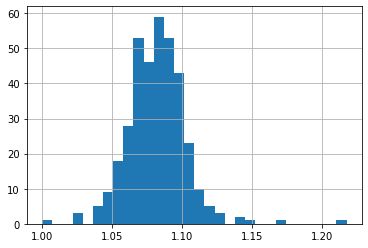

In [27]:
sessions_per_user['sessions_per_user'].hist(bins=30)

In [28]:
sessions_per_user['sessions_per_user'].mean()

1.0821660876897365

В день один пользователь в среднем заходит на сайт один раз.

#### Исследуем, сколько времени пользователи проводят на сайте. Узнаем продолжительность типичной пользовательской сессии за весь период. Чтобы выбрать подходящую среднюю меру, построим график распределения.

ASL (англ. average session length) - средняя продолжительность сессии.

Посчитаем длину всех сессий.

In [29]:
sessions['session_duration_sec'] = (sessions['end_ts'] - sessions['start_ts']).dt.seconds

Построим график распределения.

Text(0.5, 1.0, 'Распределение продолжительность сессий')

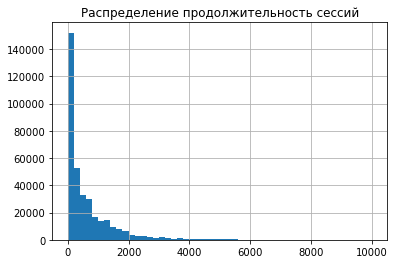

In [30]:
sessions['session_duration_sec'].hist(bins=50, range=(0,10000))
plt.title('Распределение продолжительность сессий')

Когда распределение близко к нормальному или нормальное — можно смотреть на среднюю или медиану. Наше — не из таких, рассчитаем моду (значение в выборке, которое встречается чаще всего):

In [31]:
asl = sessions['session_duration_sec'].mode()
print('asl =', int(asl), 'секунд')

asl = 60 секунд


#### Рассчитаем Retention Rate, применяя когортный анализ. Найдем средний Retention Rate на второй месяц «жизни» когорт.

Retention Rate - коэффициент удержания, показывает, сколько пользователей из когорты относительно их изначального числа вернулось в последующие периоды.

Определим событие и период — на их основе сформируем когорту. Возьмём дату, когда пользователь впервые посетал сайт, период - 1 месяц.

Сгруппируем данные по столбцу sessions['uid'] методом groupby(). Для каждого клиента получим дату его первого посещения — sessions['start_ts'].min():

In [32]:
sessions['first_session_date'] = sessions.groupby('uid')['start_ts'].transform('min')

Выделим из столбцов first_session_date и start_ts месяцы. Вызовем метод astype(): преобразуем значения столбцов к типу 'datetime64[M]'. [M] в типе datetime64 означает размерность временной метки, в данном случае — месяц:

In [33]:
sessions['first_session_month'] = sessions['first_session_date'].astype('datetime64[M]')

Для каждой строки датафрейма рассчитаем lifetime пользователя в рамках когорты.

In [34]:
sessions['session_cohort_lifetime'] = ((sessions['session_month'] - sessions['first_session_month'])
                                       /np.timedelta64(1,'M')).round().astype('int')

Сгруппируем данные по когорте и lifetime. Посчитаем для каждой когорты количество активных пользователей на определённый месяц lifetime:

In [35]:
session_cohorts = sessions.groupby(['first_session_month','session_cohort_lifetime'])['uid'].nunique().reset_index()

Найдём исходное количество пользователей в когорте.

In [36]:
session_cohorts_size = session_cohorts[session_cohorts['session_cohort_lifetime'] == 0][['first_session_month','uid']]
# переименование столбца
session_cohorts_size = session_cohorts_size.rename(columns={'uid':'session_cohort_users'})

In [37]:
session_cohorts_size

first_session_month  session_cohort_users
0           2017-06-01                 13259
12          2017-07-01                 13140
23          2017-08-01                 10181
33          2017-09-01                 16704
42          2017-10-01                 25977
50          2017-11-01                 27248
57          2017-12-01                 25268
63          2018-01-01                 22624
68          2018-02-01                 22197
72          2018-03-01                 20589
75          2018-04-01                 15709
77          2018-05-01                 15273

Объединим данные по когортам с исходным количеством пользователей в когорте:

In [38]:
session_cohorts = session_cohorts.merge(session_cohorts_size,on='first_session_month')

Вычислим retention.

In [39]:
session_cohorts['retention'] = session_cohorts['uid']/session_cohorts['session_cohort_users'] 

Построим сводную таблицу и создадим тепловую карту:

In [40]:
retention_pivot = session_cohorts.pivot_table(index='first_session_month',columns='session_cohort_lifetime',values='retention',aggfunc='sum')

In [41]:
retention_pivot.loc['mean'] = retention_pivot.mean()

In [42]:
retention_pivot

session_cohort_lifetime   0         1         2         3         4   \
first_session_month                                                    
2017-06-01 00:00:00      1.0  0.078664  0.053775  0.061392  0.068557   
2017-07-01 00:00:00      1.0  0.056088  0.051294  0.056164  0.058219   
2017-08-01 00:00:00      1.0  0.076908  0.062862  0.062764  0.050093   
2017-09-01 00:00:00      1.0  0.085489  0.069205  0.050706  0.039392   
2017-10-01 00:00:00      1.0  0.078608  0.052239  0.038958  0.034261   
2017-11-01 00:00:00      1.0  0.078281  0.044113  0.038682  0.033727   
2017-12-01 00:00:00      1.0  0.055802  0.037993  0.031107  0.020263   
2018-01-01 00:00:00      1.0  0.059715  0.039339  0.024973  0.020244   
2018-02-01 00:00:00      1.0  0.057080  0.025454  0.020093       NaN   
2018-03-01 00:00:00      1.0  0.041818  0.027053       NaN       NaN   
2018-04-01 00:00:00      1.0  0.048380       NaN       NaN       NaN   
2018-05-01 00:00:00      1.0       NaN       NaN       NaN       NaN   
mean                     1.0  0.065167  0.046333  0.042760  0.040595   

session_cohort_lifetime        5         6         7         8         9   \
first_session_month                                                         
2017-06-01 00:00:00      0.071423  0.061015  0.057772  0.052342  0.050833   
2017-07-01 00:00:00      0.048174  0.045358  0.045738  0.038813  0.028615   
2017-08-01 00:00:00      0.044004  0.036342  0.039485  0.027895  0.026029   
2017-09-01 00:00:00      0.037835  0.035860  0.024186  0.022809       NaN   
2017-10-01 00:00:00      0.032221  0.021365  0.020364       NaN       NaN   
2017-11-01 00:00:00      0.023415  0.021800       NaN       NaN       NaN   
2017-12-01 00:00:00      0.019036       NaN       NaN       NaN       NaN   
2018-01-01 00:00:00           NaN       NaN       NaN       NaN       NaN   
2018-02-01 00:00:00           NaN       NaN       NaN       NaN       NaN   
2018-03-01 00:00:00           NaN       NaN       NaN       NaN       NaN   
2018-04-01 00:00:00           NaN       NaN       NaN       NaN       NaN   
2018-05-01 00:00:00           NaN       NaN       NaN       NaN       NaN   
mean                     0.039444  0.036957  0.037509  0.035465  0.035159   

session_cohort_lifetime        10        11  
first_session_month                          
2017-06-01 00:00:00      0.040652  0.044951  
2017-07-01 00:00:00      0.027473       NaN  
2017-08-01 00:00:00           NaN       NaN  
2017-09-01 00:00:00           NaN       NaN  
2017-10-01 00:00:00           NaN       NaN  
2017-11-01 00:00:00           NaN       NaN  
2017-12-01 00:00:00           NaN       NaN  
2018-01-01 00:00:00           NaN       NaN  
2018-02-01 00:00:00           NaN       NaN  
2018-03-01 00:00:00           NaN       NaN  
2018-04-01 00:00:00           NaN       NaN  
2018-05-01 00:00:00           NaN       NaN  
mean                     0.034062  0.044951

<AxesSubplot:title={'center':'Cohorts: User Retention'}, xlabel='session_cohort_lifetime', ylabel='first_session_month'>

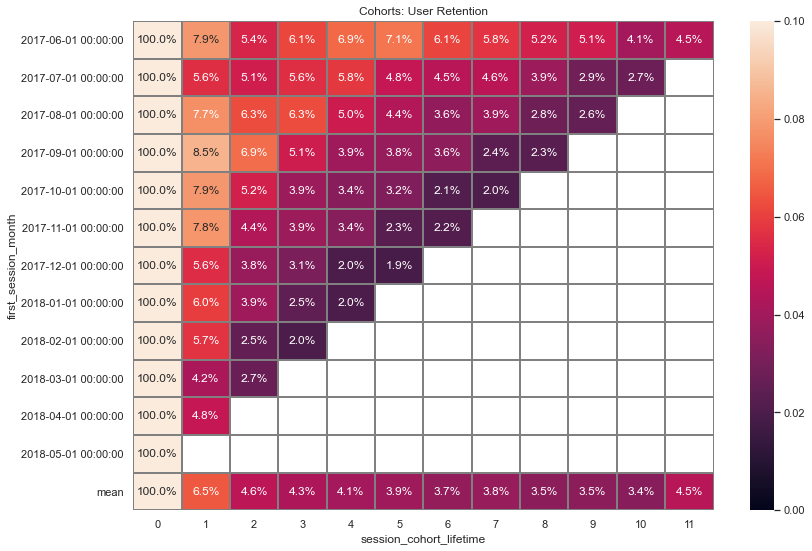

In [43]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmin = 0, vmax = 0.10)

Найдём средний Retention Rate на второй месяц «жизни» когорт.

In [44]:
retention_pivot[1].mean()

0.06516659710392834

Retention Rate по всем когортам низкий.

**Вывод по 2.1.**

Количество уникальных пользователей в день (dau) - 907.  
Количество уникальных пользователей в неделю (wau) - 5724.  
Количество уникальных пользователей в месяц (mau) -23228.  
Нобходимо обратить внимание на пики и провалы на графике DAU.  
В день один пользователь в среднем заходит на сайт один раз.  
Средняя продолжительность сессии (asl) - 1 минута.  
Retention Rate по всем когортам низкий. Retention второго месяца находится в интервале от 4,2 до 8,5% по всем когортам и в следующие меясцы идет на спад. Можно выделить первую когорту, пользователи которой первый раз зашли на сайт в июне 2017, в ней Retention снижается медленнее чем у остальных когорт.

### Метрики электронной коммерции

#### Исследуем, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки.

Определим дату первого посещения.

In [45]:
first_order_date = orders.groupby('uid')['buy_ts'].min()
first_order_date.name = 'first_order_date' # переименование имени Series

Определим дату первого посещения.

In [46]:
first_session_date = sessions.groupby('uid')['start_ts'].min()
first_session_date.name = 'first_session_date' # переименование имени Series

Объеденим данные Series в датафрейм.

In [47]:
session_order_first_date = first_order_date.to_frame().join(first_session_date,on='uid')

Вычислим сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки для каждого пользователя, который совершил заказ.

In [48]:
session_order_first_date['session_order_time'] = session_order_first_date['first_order_date'] - session_order_first_date['first_session_date']

In [49]:
session_order_first_date['session_order_time'] = session_order_first_date['session_order_time']//np.timedelta64(1, 'm')
session_order_first_date['session_order_time'] = session_order_first_date['session_order_time'].round(1)

Text(0.5, 1.0, 'Распределение разницы между временем первого заказа и началом первой сессии')

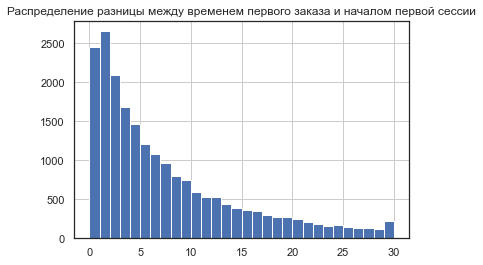

In [50]:
session_order_first_date.session_order_time.hist(bins=30, range=(0,30))
plt.title('Распределение разницы между временем первого заказа и началом первой сессии')

Text(0.5, 1.0, 'Диаграмма размаха разницы между временем первого заказа и началом первой сессии')

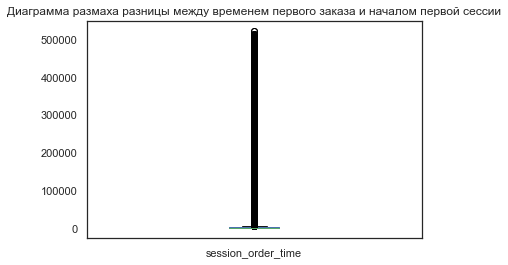

In [51]:
session_order_first_date.session_order_time.plot.box()
plt.title('Диаграмма размаха разницы между временем первого заказа и началом первой сессии')

In [52]:
session_order_first_date.session_order_time.describe()

count     36523.000000
mean      24340.175834
std       67784.774690
min           0.000000
25%           4.000000
50%          16.000000
75%        2897.000000
max      523144.000000
Name: session_order_time, dtype: float64

В данном случае лучше взять медианное время.

У большей части пользователей на оформление заказа уходит не более 5 минут.  
Медианная разница во времени между моментом совершения заказа и датой и временем первого визита - 16 минут.

#### Применяя когортный анализ или другой метод, рассчитаем среднее количество покупок на одного покупателя за определённый период, например за 6 месяцев.

Выделим в orders в отдельные столбцы год, месяц и неделю, а также полную дату.

In [53]:
orders['order_year']  = orders['buy_ts'].dt.year
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
orders['order_week']  = orders['buy_ts'].astype('datetime64[W]')
orders['order_day'] = orders['buy_ts'].dt.date

Добавим столбец с первым месяцем заказа.

In [54]:
orders['first_order_month'] = orders.groupby('uid')['order_month'].transform(min)

Сформируем месячные когорты.

In [55]:
orders['cohort_lifetime'] = orders['order_month'] - orders['first_order_month']
orders['cohort_lifetime'] = orders['cohort_lifetime'] / np.timedelta64(1,'M')
orders['cohort_lifetime'] = orders['cohort_lifetime'].round().astype('int')

Сформируем сводную таблицу из orders по first_order_month', 'cohort_lifetime', вычислим количество покупателей и колличество заказов, найдем среднее.

In [56]:
cohorts2 = orders.groupby(['first_order_month','cohort_lifetime']).agg({'uid':['nunique','count']}).reset_index()

In [57]:
cohorts2['mean'] = cohorts2['uid', 'count'] / cohorts2['uid', 'nunique']

In [58]:
cohorts2

first_order_month cohort_lifetime     uid            mean
                                     nunique count          
0         2017-06-01               0    2023  2354  1.163618
1         2017-06-01               1      61   177  2.901639
2         2017-06-01               2      50   174  3.480000
3         2017-06-01               3      54   226  4.185185
4         2017-06-01               4      88   292  3.318182
..               ...             ...     ...   ...       ...
74        2018-03-01               2      58   176  3.034483
75        2018-04-01               0    2276  2495  1.096221
76        2018-04-01               1      69   195  2.826087
77        2018-05-01               0    2988  3249  1.087349
78        2018-06-01               0       1     1  1.000000

[79 rows x 5 columns]

Оставим в таблице когорты старше 6 месяцев, возьмем период 6 месяцев и вычислим среднее.

In [59]:
cohorts2[(cohorts2['cohort_lifetime'] < 6) & (cohorts2['first_order_month'] < '2018-01-01')]['mean'].mean()

1.829449186230418

In [60]:
cohorts3 =cohorts2.reset_index().pivot_table(index='first_order_month', columns='cohort_lifetime', values='mean', aggfunc='mean')

C:\Users\NDSko\anaconda3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [61]:
cohorts3.loc['mean'] = cohorts3.mean()

<AxesSubplot:title={'center':'среднее количество покупок на одного покупателя'}, xlabel='None-cohort_lifetime', ylabel='first_order_month'>

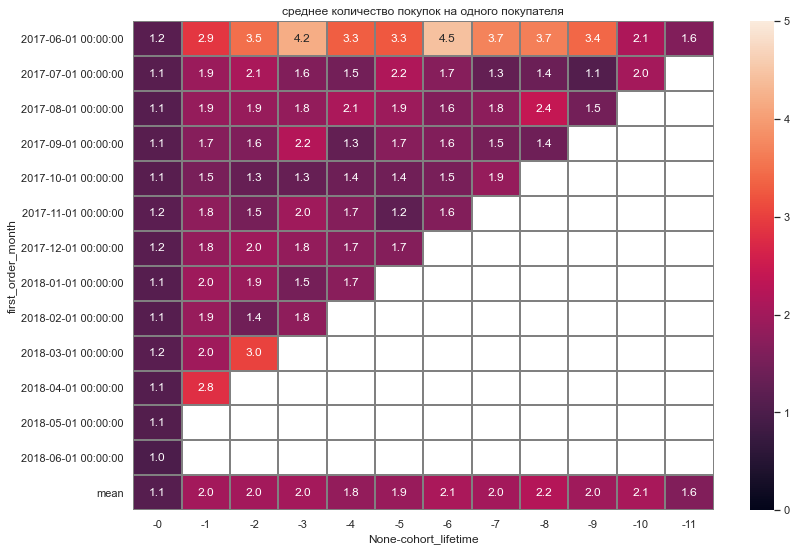

In [62]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('среднее количество покупок на одного покупателя')
sns.heatmap(cohorts3, annot=True, fmt='.1f', linewidths=1, linecolor='gray', vmin = 0, vmax = 5)

Среднее количество покупок на одного покупателя за 6 месяцев составляет 1,83.

#### Рассчитаем средний чек

Средний чек — сумма покупок, делённая на число покупателей.

Сгруппируем данные по когорте first_order_month и месяцу совершения заказа order_month, посчитаем сумму revenue и количество клиентов.

In [63]:
average_check = orders.groupby(['first_order_month','order_month']).agg({'revenue':'sum','uid':'count'})

In [64]:
average_check.head()

revenue   uid
first_order_month order_month               
2017-06-01        2017-06-01   9557.49  2354
                  2017-07-01    981.82   177
                  2017-08-01    885.34   174
                  2017-09-01   1931.30   226
                  2017-10-01   2068.58   292

Разделим показатель revenue на количество клиентов uid.

In [65]:
average_check['revenue_per_user'] = average_check['revenue'] / average_check['uid']

In [66]:
average_check.head()

revenue   uid  revenue_per_user
first_order_month order_month                                 
2017-06-01        2017-06-01   9557.49  2354          4.060106
                  2017-07-01    981.82   177          5.547006
                  2017-08-01    885.34   174          5.088161
                  2017-09-01   1931.30   226          8.545575
                  2017-10-01   2068.58   292          7.084178

Построим сводную таблицу изменения среднего чека в когортах по месяцу совершения покупки и оценим, как изменяется средний чек с течением времени.

In [67]:
average_check.pivot_table(index='first_order_month',columns='order_month',values='revenue_per_user',aggfunc='mean') .fillna('')

order_month       2017-06-01 2017-07-01 2017-08-01 2017-09-01 2017-10-01  \
first_order_month                                                          
2017-06-01           4.06011    5.54701    5.08816    8.54558    7.08418   
2017-07-01                      5.28712     6.4461    9.99208     6.6376   
2017-08-01                                 4.71548    5.98731     6.2812   
2017-09-01                                            4.96711    13.1712   
2017-10-01                                                       4.37474   
2017-11-01                                                                 
2017-12-01                                                                 
2018-01-01                                                                 
2018-02-01                                                                 
2018-03-01                                                                 
2018-04-01                                                                 
2018-05-01                                                                 
2018-06-01                                                                 

order_month       2017-11-01 2017-12-01 2018-01-01 2018-02-01 2018-03-01  \
first_order_month                                                          
2017-06-01           6.82532    6.96645    6.76184    5.27901    8.00987   
2017-07-01           4.72181    3.65951    3.78951     5.4544    5.34569   
2017-08-01            6.6179    7.96294    6.26532       5.89    7.11359   
2017-09-01           8.35106    62.5702    15.4304    15.3218    16.7671   
2017-10-01           7.40513    5.12747    5.59025    5.09899    5.07155   
2017-11-01           4.37072    4.10395    4.47467    6.28498    4.44147   
2017-12-01                      4.11075    4.22674    20.0728    26.0844   
2018-01-01                                 3.68742    4.43848    6.45497   
2018-02-01                                            3.70627    4.57649   
2018-03-01                                                       4.13934   
2018-04-01                                                                 
2018-05-01                                                                 
2018-06-01                                                                 

order_month       2018-04-01 2018-05-01 2018-06-01  
first_order_month                                   
2017-06-01           12.0381    6.04209             
2017-07-01             11.79     5.6483             
2017-08-01           8.70283    5.59848             
2017-09-01           11.2066    7.78557             
2017-10-01           4.28023    4.00912             
2017-11-01           3.72678    4.59824             
2017-12-01           15.9485     14.111             
2018-01-01           7.52484    2.71128             
2018-02-01           3.45373    3.86714             
2018-03-01           5.97219    6.33449             
2018-04-01           4.24877    6.20472             
2018-05-01                      4.28617             
2018-06-01                                    3.42

Построим сводную таблицу изменения среднего чека, где в столбцах будет lifetime, а строках — когорты:

In [68]:
average_check_lifetime = orders.groupby(['first_order_month','cohort_lifetime']).agg({'revenue':'sum','uid':'count'})

In [69]:
average_check_lifetime['revenue_per_user'] = average_check_lifetime['revenue'] / average_check_lifetime['uid']

In [70]:
average_check2 = average_check_lifetime.pivot_table(index='first_order_month',columns='cohort_lifetime',values='revenue_per_user',aggfunc='mean')

<AxesSubplot:title={'center':'average_check'}, xlabel='cohort_lifetime', ylabel='first_order_month'>

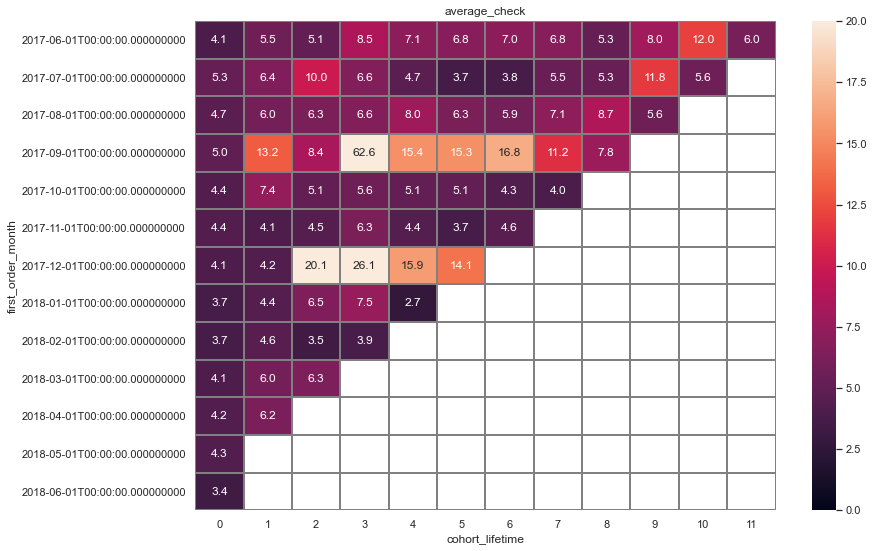

In [71]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('average_check')
sns.heatmap(average_check2, annot=True, fmt='.1f', linewidths=1, linecolor='gray', vmin = 0, vmax = 20)

In [72]:
average_check.revenue_per_user.median()

5.648301886792455

Средний медианный чек равен 5,64 у.е.  
Во всех когортах средний чек возрастает на следующий месяц после месяца первой покупки.  
Необходимо обратить внимание на когорты 2017-09-01, 2017-12-01 (в них есть более высокие средние чеки)

#### Выясним, как меняется во времени LTV на покупателя по когортам. Помним, что LTV — накопительная метрика. Рассчитаем средний LTV по когортам за 6 месяцев; в расчёт включим когорты, «прожившие» не менее 6 месяцев. Маржинальность сервиса — 100%.

LTV (от англ. lifetime value) — «пожизненная» ценность клиента. Это — итоговая сумма денег, которую один клиент приносит в среднем со всех своих покупок. При расчёте LTV обычно обращаются к валовой прибыли с клиента за период.

In [73]:
orders[orders['first_order_month'] == '2018-06-01']

buy_ts  revenue                uid  order_year order_month  \
50414 2018-06-01 00:02:00     3.42  83872787173869366        2018  2018-06-01   

      order_week   order_day first_order_month  cohort_lifetime  
50414 2018-05-31  2018-06-01        2018-06-01                0

Удалим одну строчку заказа в июне 2018.

In [74]:
orders = orders.drop(index=[50414])

Сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку. Сбросим индекс методом reset_index():

In [75]:
lifetime_value = orders.groupby(['first_order_month','order_month']).agg({'revenue': 'sum', 'cohort_lifetime':'mean'}).reset_index()

In [76]:
lifetime_value.head()

first_order_month order_month  revenue  cohort_lifetime
0        2017-06-01  2017-06-01  9557.49                0
1        2017-06-01  2017-07-01   981.82                1
2        2017-06-01  2017-08-01   885.34                2
3        2017-06-01  2017-09-01  1931.30                3
4        2017-06-01  2017-10-01  2068.58                4

Посчитаем количество новых покупателей (n_buyers) за каждый месяц:

In [77]:
orders_cohort_sizes = orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
orders_cohort_sizes.columns = ['first_order_month', 'n_buyers']

In [78]:
orders_cohort_sizes

first_order_month  n_buyers
0         2017-06-01      2023
1         2017-07-01      1923
2         2017-08-01      1370
3         2017-09-01      2581
4         2017-10-01      4340
5         2017-11-01      4081
6         2017-12-01      4383
7         2018-01-01      3373
8         2018-02-01      3651
9         2018-03-01      3533
10        2018-04-01      2276
11        2018-05-01      2988

Добавим в таблицу lifetime_value данные о том, сколько людей первый раз совершили покупку в каждый месяц:

In [79]:
lifetime_value = pd.merge(orders_cohort_sizes, lifetime_value, on='first_order_month')

In [80]:
lifetime_value.head()

first_order_month  n_buyers order_month  revenue  cohort_lifetime
0        2017-06-01      2023  2017-06-01  9557.49                0
1        2017-06-01      2023  2017-07-01   981.82                1
2        2017-06-01      2023  2017-08-01   885.34                2
3        2017-06-01      2023  2017-09-01  1931.30                3
4        2017-06-01      2023  2017-10-01  2068.58                4

Найдем валовую прибыль, умножив выручку на маржинальность.

In [81]:
margin_rate = 1
    
lifetime_value['gp'] = lifetime_value['revenue'] * margin_rate

In [82]:
lifetime_value.head()

first_order_month  n_buyers order_month  revenue  cohort_lifetime       gp
0        2017-06-01      2023  2017-06-01  9557.49                0  9557.49
1        2017-06-01      2023  2017-07-01   981.82                1   981.82
2        2017-06-01      2023  2017-08-01   885.34                2   885.34
3        2017-06-01      2023  2017-09-01  1931.30                3  1931.30
4        2017-06-01      2023  2017-10-01  2068.58                4  2068.58

Разделим валовую прибыль когорт за каждый месяц на общее число пользователей в каждой когорте и визуализируем когорты в виде сводной таблицы:

In [83]:
lifetime_value['ltv'] = lifetime_value['gp'] / lifetime_value['n_buyers']
    
df_ltv = lifetime_value.pivot_table(
        index='first_order_month', 
        columns='cohort_lifetime', 
        values='ltv', 
        aggfunc='mean').cumsum(axis=1).round(2)

In [84]:
df_ltv.loc['mean'] = df_ltv.mean()

In [85]:
df_ltv

cohort_lifetime            0         1      2          3        4      5   \
first_order_month                                                           
2017-06-01 00:00:00  4.720000  5.210000  5.650   6.600000   7.6200   8.36   
2017-07-01 00:00:00  6.010000  6.350000  6.970   7.330000   7.5000   7.66   
2017-08-01 00:00:00  5.280000  5.750000  6.210   6.600000   7.0900   7.38   
2017-09-01 00:00:00  5.640000  6.760000  7.280  11.260000  11.6600  12.31   
2017-10-01 00:00:00  5.000000  5.540000  5.730   5.890000   6.0400   6.16   
2017-11-01 00:00:00  5.150000  5.550000  5.750   6.080000   6.2300   6.28   
2017-12-01 00:00:00  4.740000  5.000000  5.920   6.990000   7.3000   7.64   
2018-01-01 00:00:00  4.140000  4.430000  4.730   4.880000   4.9400    NaN   
2018-02-01 00:00:00  4.160000  4.440000  4.510   4.590000      NaN    NaN   
2018-03-01 00:00:00  4.840000  5.140000  5.460        NaN      NaN    NaN   
2018-04-01 00:00:00  4.660000  5.190000    NaN        NaN      NaN    NaN   
2018-05-01 00:00:00  4.660000       NaN    NaN        NaN      NaN    NaN   
mean                 4.916667  5.396364  5.821   6.691111   7.2975   7.97   

cohort_lifetime             6       7        8      9       10     11  
first_order_month                                                      
2017-06-01 00:00:00   9.310000   9.890  10.4500  11.05  11.620  11.88  
2017-07-01 00:00:00   7.780000   7.920   8.0800   8.23   8.390    NaN  
2017-08-01 00:00:00   7.590000   7.990   8.2800   8.47     NaN    NaN  
2017-09-01 00:00:00  13.010000  13.250  13.4400    NaN     NaN    NaN  
2017-10-01 00:00:00   6.240000   6.360      NaN    NaN     NaN    NaN  
2017-11-01 00:00:00   6.400000     NaN      NaN    NaN     NaN    NaN  
2017-12-01 00:00:00        NaN     NaN      NaN    NaN     NaN    NaN  
2018-01-01 00:00:00        NaN     NaN      NaN    NaN     NaN    NaN  
2018-02-01 00:00:00        NaN     NaN      NaN    NaN     NaN    NaN  
2018-03-01 00:00:00        NaN     NaN      NaN    NaN     NaN    NaN  
2018-04-01 00:00:00        NaN     NaN      NaN    NaN     NaN    NaN  
2018-05-01 00:00:00        NaN     NaN      NaN    NaN     NaN    NaN  
mean                  8.388333   9.082  10.0625   9.25  10.005  11.88

<AxesSubplot:title={'center':'LTV'}, xlabel='cohort_lifetime', ylabel='first_order_month'>

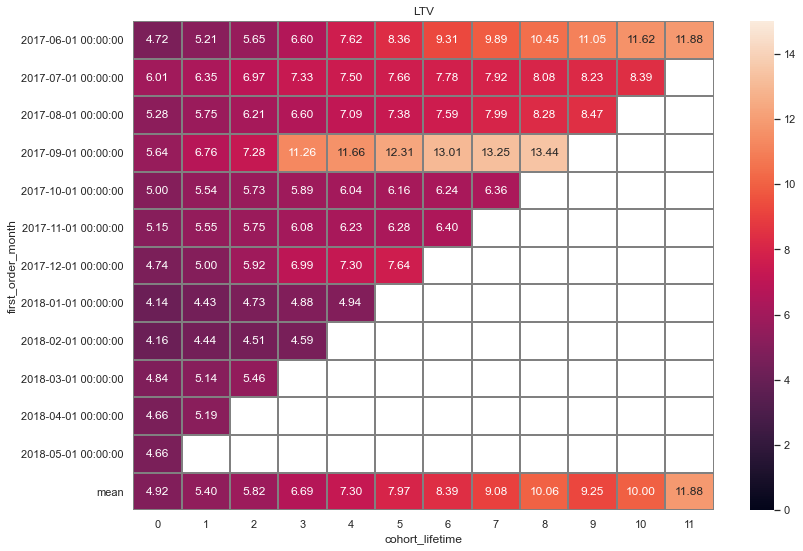

In [86]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('LTV')
sns.heatmap(df_ltv, annot=True, fmt='.2f', linewidths=1, linecolor='gray', vmin = 0, vmax = 15)

Вычислим среднее ltv за 6 месяцев.

In [87]:
df_ltv[5].mean()

7.970000000000001

**Вывод по 2.2**

У большей части пользователей на оформление заказа уходит не более 5 минут.  
Медианная разница во времени между моментом совершения заказа и датой и временем первого визита - 16 минут.

Среднее количество покупок на одного покупателя за 6 месяцев составляет 1,83.

Средний медианный чек равен 5,64 у.е.  
Во всех когортах средний чек возрастает на следующий месяц после месяца первой покупки.  
Необходимо обратить внимание на когорты 2017-09-01, 2017-12-01 (в них есть более высокие средние чеки)

Среднее ltv за 6 месяцев = 7,97. Выделяются когорты 2017-06-01 и 2017-09-01 (ltv выше).

### Маркетинговые метрики

#### Посчитаем общую сумму расходов на маркетинг. Выясним, как траты распределены по источникам.

Добавим столбцец с месяцем трат.

In [88]:
expenses['expenses_month'] = expenses['dt'].astype('datetime64[M]')

Общая сумма расходов на маркетинг:

In [89]:
expenses['costs'].sum()

329131.62

Распределение трат по источникам:

In [90]:
expenses.groupby('source_id')['costs'].sum()

source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64

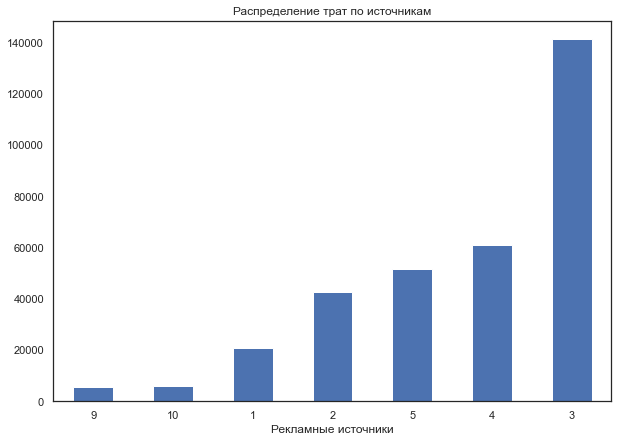

In [91]:
expenses.groupby('source_id')['costs'].sum().sort_values().plot(kind='bar', figsize = (10,7), rot=0)
plt.title('Распределение трат по источникам')
plt.xlabel('Рекламные источники')
plt.show()

Распределение трат по времени:

In [92]:
expenses.groupby(['expenses_month'])['costs'].sum()

expenses_month
2017-06-01    18015.00
2017-07-01    18240.59
2017-08-01    14790.54
2017-09-01    24368.91
2017-10-01    36322.88
2017-11-01    37907.88
2017-12-01    38315.35
2018-01-01    33518.52
2018-02-01    32723.03
2018-03-01    30415.27
2018-04-01    22289.38
2018-05-01    22224.27
Name: costs, dtype: float64

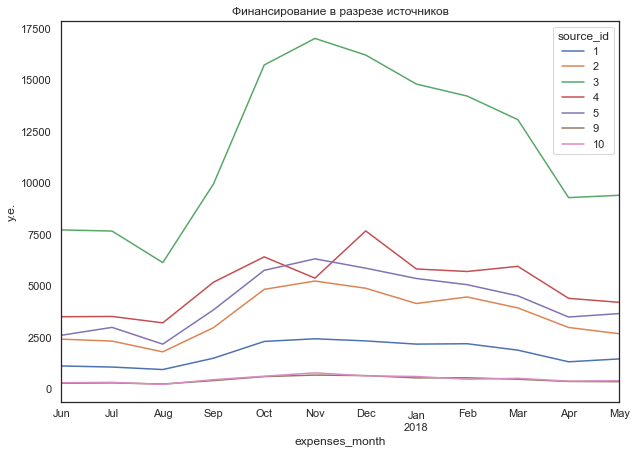

In [93]:
expenses.pivot_table(index = 'expenses_month', columns = 'source_id', values='costs', aggfunc='sum').plot(
    figsize = (10,7), title= 'Финансирование в разрезе источников')
plt.ylabel('у.е.')
plt.show()

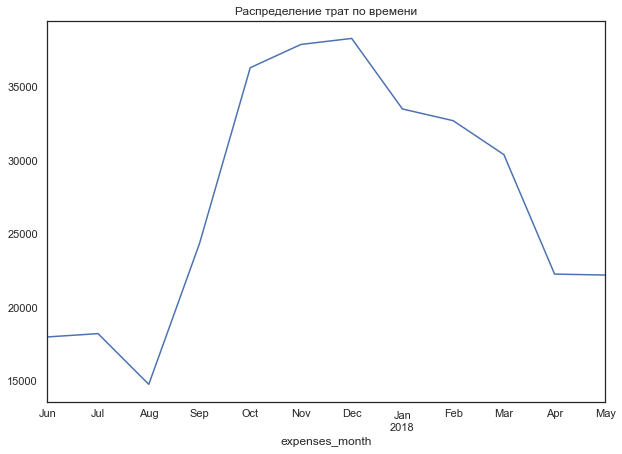

In [94]:
expenses.groupby(['expenses_month'])['costs'].sum().plot(figsize = (10,7))
plt.title('Распределение трат по времени')
plt.show()

Больше всего денег тратится на рекламный истоник №3.  
Меньше всего затрат летом.

#### Рассчитаем средний CAC на одного покупателя для всего проекта и для каждого источника трафика.

CAC (от англ. customer acquisition cost) — стоимость привлечения клиента. Сумма денег, во сколько обходится новый клиент компании.

**Рассчитаем средний CAC на одного покупателя для всего проекта (по всему периоду, по месяцам, по дням).**

**По месяцам:**

Вычислим затраты по месяцам.

In [95]:
expenses_month = expenses.groupby('expenses_month')['costs'].sum()

In [96]:
expenses_month

expenses_month
2017-06-01    18015.00
2017-07-01    18240.59
2017-08-01    14790.54
2017-09-01    24368.91
2017-10-01    36322.88
2017-11-01    37907.88
2017-12-01    38315.35
2018-01-01    33518.52
2018-02-01    32723.03
2018-03-01    30415.27
2018-04-01    22289.38
2018-05-01    22224.27
Name: costs, dtype: float64

Добавим их к таблице orders_cohort_sizes.

In [97]:
cac_month = orders_cohort_sizes.merge(expenses_month, left_on='first_order_month', right_on='expenses_month', how='left')

In [98]:
cac_month

first_order_month  n_buyers     costs
0         2017-06-01      2023  18015.00
1         2017-07-01      1923  18240.59
2         2017-08-01      1370  14790.54
3         2017-09-01      2581  24368.91
4         2017-10-01      4340  36322.88
5         2017-11-01      4081  37907.88
6         2017-12-01      4383  38315.35
7         2018-01-01      3373  33518.52
8         2018-02-01      3651  32723.03
9         2018-03-01      3533  30415.27
10        2018-04-01      2276  22289.38
11        2018-05-01      2988  22224.27

Вычислим cac по месяцам:

In [99]:
cac_month['cac'] = cac_month['costs'] / cac_month['n_buyers']

In [100]:
cac_month

first_order_month  n_buyers     costs        cac
0         2017-06-01      2023  18015.00   8.905091
1         2017-07-01      1923  18240.59   9.485486
2         2017-08-01      1370  14790.54  10.796015
3         2017-09-01      2581  24368.91   9.441654
4         2017-10-01      4340  36322.88   8.369327
5         2017-11-01      4081  37907.88   9.288870
6         2017-12-01      4383  38315.35   8.741809
7         2018-01-01      3373  33518.52   9.937302
8         2018-02-01      3651  32723.03   8.962758
9         2018-03-01      3533  30415.27   8.608907
10        2018-04-01      2276  22289.38   9.793225
11        2018-05-01      2988  22224.27   7.437841

Text(0.5, 1.0, 'cac_month')

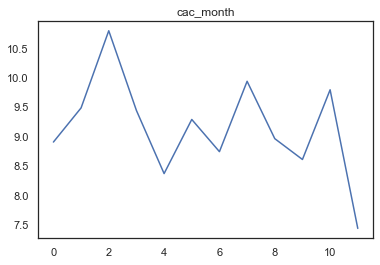

In [101]:
cac_month['cac'].plot()
plt.title('cac_month')

**По дням:**

Добавим дату первой покупки в orders.

In [102]:
orders['first_order_date'] = orders.groupby('uid')['buy_ts'].transform('min')
orders['first_order_date'] = orders['first_order_date'].dt.date
orders['first_order_date'] = pd.to_datetime(orders['first_order_date'])

Посчитаем количество уникальных клиентов по дням.

In [103]:
day_client = orders.groupby('first_order_date').agg({'uid': 'nunique'})

Посчитаем затраты по дням.

In [104]:
day_costs = expenses.groupby('dt').agg({'costs' : 'sum'}).reset_index()

Соединим таблицы

In [105]:
general_cac_day = day_costs.merge(day_client, how='left', left_on = 'dt', right_on ='first_order_date')

Вычислим cac по дням.

In [106]:
general_cac_day['cac'] = general_cac_day['costs']/general_cac_day['uid']

In [107]:
general_cac_day.head()

dt   costs    uid        cac
0 2017-06-01  735.26   86.0   8.549535
1 2017-06-02  721.19   97.0   7.434948
2 2017-06-03  450.85   57.0   7.909649
3 2017-06-04  761.16   55.0  13.839273
4 2017-06-05  821.44  141.0   5.825816

In [108]:
general_cac_day.query('uid == "NaN"') # 31 марта 2018 новых клиентов не было, а затраты были

dt  costs  uid  cac
303 2018-03-31    0.7  NaN  NaN

Средний CAC на одного покупателя для всего проекта равен:

In [109]:
general_cac_day['cac'].mean() #среднее по дневным cac

9.780967238898866

In [110]:
cac_month['cac'].mean() #среднее по месячным cac

9.147357292482544

In [111]:
expenses['costs'].sum()/orders['uid'].nunique() #среднее по всему периоду

9.011872843765401

**Рассчитаем средний CAC на одного покупателя для каждого источника трафика.**

Т.к. у клиентов может быть несколько истоников трафика, оставим только тот, с которого он пришёл первый раз.

In [112]:
first_source = sessions.sort_values('start_ts').groupby('uid').first()

Добавим первый source_id в orders.

In [113]:
orders = orders.merge(first_source, on='uid', how='left')

Вычислим количество новых пользователей по каждому источнику трафика по месяцам.

In [114]:
uid_source = orders.groupby(['first_order_month', 'source_id']).agg({'uid':'nunique'}).reset_index()

In [115]:
uid_source.head()

first_order_month  source_id  uid
0        2017-06-01          1  190
1        2017-06-01          2  235
2        2017-06-01          3  638
3        2017-06-01          4  413
4        2017-06-01          5  384

Вычислим затраты по каждому источнику трафика по месяцам.

In [116]:
costs_source = expenses.groupby(['expenses_month', 'source_id']).agg({'costs':'sum'}).reset_index()

In [117]:
costs_source.head()

expenses_month  source_id    costs
0     2017-06-01          1  1125.61
1     2017-06-01          2  2427.38
2     2017-06-01          3  7731.65
3     2017-06-01          4  3514.80
4     2017-06-01          5  2616.12

Объеденим таблицы.

In [118]:
cac_source = costs_source.merge(uid_source, how='left', left_on = ['expenses_month', 'source_id'], right_on = ['first_order_month', 'source_id'])

Вычислим cac.

In [119]:
cac_source['cac'] = cac_source['costs']/cac_source['uid']

Вычислим средний cac по каждому источнику трафика.

In [120]:
cac_source.groupby('source_id')['cac'].mean()

source_id
1      7.212107
2     12.504068
3     13.802743
4      6.439374
5      7.451938
9      5.413892
10     4.867125
Name: cac, dtype: float64

In [121]:
orders.query('source_id == 7') # в затратах такого источника нет

buy_ts  revenue                   uid  order_year  \
5485 2017-08-17 11:20:00     1.22  11377414203346034748        2017   

     order_month order_week   order_day first_order_month  cohort_lifetime  \
5485  2017-08-01 2017-08-17  2017-08-17        2017-08-01                0   

     first_order_date  ...            start_ts session_week_new  session_year  \
5485       2017-08-17  ... 2017-08-17 10:28:00       2017-08-14          2017   

     session_month session_week  session_day session_duration_sec  \
5485    2017-08-01   2017-08-17   2017-08-17                 5280   

      first_session_date first_session_month  session_cohort_lifetime  
5485 2017-08-17 10:28:00          2017-08-01                        0  

[1 rows x 23 columns]

Дороже всего обходятся клиенты с истоников трафика 2 и 3.

#### Рассчитаем ROMI по когортам в разрезе источников. Сравним окупаемость за одинаковые периоды жизни когорт. Обратим внимание, что клиенты, пришедшие из разных источников, могут иметь разный LTV.

Return on Marketing Investment или сокращенно ROMI – это показатель рентабельности рекламных кампаний.

In [122]:
mean_cohort_romi = pd.DataFrame() # в этот датафрейм добавим в конце цикла средние когорты
# создаем цикл по источникам трафика
for i in list(expenses['source_id'].unique()):
    orders_romi = orders[orders['source_id'] == i] # фильтр по источнику
    # рассчитываем ltv 
    lifetime_value_romi = orders_romi.groupby(['first_order_month','order_month']).agg({'revenue': 'sum', 'cohort_lifetime':'mean'}).reset_index()
    cohort_sizes_romi = orders_romi.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
    cohort_sizes_romi.columns = ['first_order_month', 'n_buyers']
    lifetime_value_romi = pd.merge(cohort_sizes_romi, lifetime_value_romi, on='first_order_month')
    margin_rate = 1
    lifetime_value_romi['gp'] = lifetime_value_romi['revenue'] * margin_rate
    lifetime_value_romi['ltv'] = lifetime_value_romi['gp'] / lifetime_value_romi['n_buyers']
    expenses_romi = expenses[expenses['source_id'] == i] # фильтр по источнику
    # рассчитываем cac 
    monthly_costs = expenses_romi.groupby('expenses_month')['costs'].sum()
    lifetime_value_romi = pd.merge(lifetime_value_romi, monthly_costs, left_on='first_order_month', right_on='expenses_month')
    lifetime_value_romi['cac'] = lifetime_value_romi['costs'] / lifetime_value_romi['n_buyers']
    # рассчитываем romi 
    lifetime_value_romi['romi'] = lifetime_value_romi['ltv'] / lifetime_value_romi['cac']
    output = lifetime_value_romi.pivot_table(
            index='first_order_month', 
            columns='cohort_lifetime', 
            values='romi', 
            aggfunc='mean')
    output.cumsum(axis=1).round(2)
    a = output.cumsum(axis=1).mean(axis=0) # расчет romi средней когорты
    a.name = i
    mean_cohort_romi = pd.concat([mean_cohort_romi, a], axis=1)
    display(i)
    display(output.cumsum(axis=1).round(2))

1

cohort_lifetime      0     1     2     3     4     5     6     7     8     9   \
first_order_month                                                               
2017-06-01         1.22  1.59  1.97  2.60  3.32  3.67  4.10  4.53  4.91  5.19   
2017-07-01         1.09  1.25  2.05  2.27  2.41  2.54  2.61  2.70  2.83  2.98   
2017-08-01         0.89  1.03  1.15  1.27  1.39  1.47  1.55  1.86  2.13  2.22   
2017-09-01         0.91  1.18  1.27  1.41  1.41  1.43  1.44  1.49  1.57   NaN   
2017-10-01         0.88  1.04  1.07  1.13  1.14  1.16  1.18  1.23   NaN   NaN   
2017-11-01         0.98  1.06  1.18  1.30  1.32  1.34  1.35   NaN   NaN   NaN   
2017-12-01         0.65  0.69  0.73  0.77  0.77  0.78   NaN   NaN   NaN   NaN   
2018-01-01         0.63  0.64  0.65  0.76  0.76   NaN   NaN   NaN   NaN   NaN   
2018-02-01         0.58  0.71  0.72  0.76   NaN   NaN   NaN   NaN   NaN   NaN   
2018-03-01         1.39  1.67  1.79   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-04-01         0.63  0.67   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-05-01         0.86   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

cohort_lifetime      10    11  
first_order_month              
2017-06-01         5.40  5.68  
2017-07-01         3.12   NaN  
2017-08-01          NaN   NaN  
2017-09-01          NaN   NaN  
2017-10-01          NaN   NaN  
2017-11-01          NaN   NaN  
2017-12-01          NaN   NaN  
2018-01-01          NaN   NaN  
2018-02-01          NaN   NaN  
2018-03-01          NaN   NaN  
2018-04-01          NaN   NaN  
2018-05-01          NaN   NaN

2

cohort_lifetime      0     1     2     3     4     5     6     7     8     9   \
first_order_month                                                               
2017-06-01         0.43  0.48  0.50  0.69  0.85  0.94  1.10  1.24  1.37  1.44   
2017-07-01         0.75  0.82  0.83  0.85  0.89  0.91  0.94  0.95  0.96  0.98   
2017-08-01         0.39  0.45  0.47  0.48  0.52  0.52  0.53  0.56  0.56  0.56   
2017-09-01         0.61  1.21  1.39  1.46  1.56  1.63  1.88  1.94  1.98   NaN   
2017-10-01         0.63  0.83  0.88  0.93  0.97  0.99  1.00  1.02   NaN   NaN   
2017-11-01         0.53  0.60  0.63  0.69  0.72  0.73  0.74   NaN   NaN   NaN   
2017-12-01         0.69  0.81  1.53  2.39  2.63  2.88   NaN   NaN   NaN   NaN   
2018-01-01         0.31  0.38  0.50  0.52  0.54   NaN   NaN   NaN   NaN   NaN   
2018-02-01         0.35  0.40  0.42  0.44   NaN   NaN   NaN   NaN   NaN   NaN   
2018-03-01         0.45  0.52  0.62   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-04-01         0.40  0.44   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-05-01         1.05   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

cohort_lifetime      10    11  
first_order_month              
2017-06-01         1.57  1.61  
2017-07-01         1.01   NaN  
2017-08-01          NaN   NaN  
2017-09-01          NaN   NaN  
2017-10-01          NaN   NaN  
2017-11-01          NaN   NaN  
2017-12-01          NaN   NaN  
2018-01-01          NaN   NaN  
2018-02-01          NaN   NaN  
2018-03-01          NaN   NaN  
2018-04-01          NaN   NaN  
2018-05-01          NaN   NaN

3

cohort_lifetime      0     1     2     3     4     5     6     7     8     9   \
first_order_month                                                               
2017-06-01         0.36  0.37  0.39  0.41  0.43  0.44  0.45  0.46  0.46  0.47   
2017-07-01         0.41  0.42  0.43  0.46  0.46  0.47  0.47  0.48  0.48  0.49   
2017-08-01         0.28  0.29  0.30  0.31  0.32  0.32  0.32  0.33  0.33  0.34   
2017-09-01         0.44  0.46  0.48  0.49  0.51  0.51  0.52  0.53  0.54   NaN   
2017-10-01         0.35  0.38  0.39  0.40  0.41  0.41  0.41  0.42   NaN   NaN   
2017-11-01         0.32  0.33  0.34  0.35  0.35  0.35  0.36   NaN   NaN   NaN   
2017-12-01         0.34  0.35  0.36  0.37  0.38  0.38   NaN   NaN   NaN   NaN   
2018-01-01         0.28  0.29  0.30  0.31  0.31   NaN   NaN   NaN   NaN   NaN   
2018-02-01         0.29  0.31  0.32  0.33   NaN   NaN   NaN   NaN   NaN   NaN   
2018-03-01         0.32  0.33  0.35   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-04-01         0.30  0.40   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-05-01         0.35   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

cohort_lifetime      10    11  
first_order_month              
2017-06-01         0.47  0.47  
2017-07-01         0.49   NaN  
2017-08-01          NaN   NaN  
2017-09-01          NaN   NaN  
2017-10-01          NaN   NaN  
2017-11-01          NaN   NaN  
2017-12-01          NaN   NaN  
2018-01-01          NaN   NaN  
2018-02-01          NaN   NaN  
2018-03-01          NaN   NaN  
2018-04-01          NaN   NaN  
2018-05-01          NaN   NaN

4

cohort_lifetime      0     1     2     3     4     5     6     7     8     9   \
first_order_month                                                               
2017-06-01         0.56  0.56  0.58  0.64  0.77  0.95  1.11  1.14  1.17  1.26   
2017-07-01         0.81  0.82  0.83  0.86  0.86  0.87  0.89  0.89  0.91  0.92   
2017-08-01         0.53  0.55  0.56  0.59  0.61  0.63  0.64  0.66  0.67  0.68   
2017-09-01         0.54  0.60  0.63  0.66  0.67  0.70  0.84  0.87  0.88   NaN   
2017-10-01         0.80  0.82  0.85  0.87  0.89  0.91  0.93  0.94   NaN   NaN   
2017-11-01         1.12  1.26  1.29  1.38  1.42  1.43  1.48   NaN   NaN   NaN   
2017-12-01         0.75  0.76  0.78  0.80  0.80  0.82   NaN   NaN   NaN   NaN   
2018-01-01         0.67  0.69  0.71  0.72  0.72   NaN   NaN   NaN   NaN   NaN   
2018-02-01         0.79  0.81  0.82  0.82   NaN   NaN   NaN   NaN   NaN   NaN   
2018-03-01         0.83  0.84  0.86   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-04-01         0.78  0.81   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-05-01         0.90   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

cohort_lifetime      10    11  
first_order_month              
2017-06-01         1.41  1.42  
2017-07-01         0.92   NaN  
2017-08-01          NaN   NaN  
2017-09-01          NaN   NaN  
2017-10-01          NaN   NaN  
2017-11-01          NaN   NaN  
2017-12-01          NaN   NaN  
2018-01-01          NaN   NaN  
2018-02-01          NaN   NaN  
2018-03-01          NaN   NaN  
2018-04-01          NaN   NaN  
2018-05-01          NaN   NaN

5

cohort_lifetime      0     1     2     3     4     5     6     7     8     9   \
first_order_month                                                               
2017-06-01         0.73  0.86  0.92  1.05  1.15  1.19  1.33  1.41  1.49  1.63   
2017-07-01         0.75  0.79  0.86  0.88  0.89  0.91  0.91  0.92  0.94  0.95   
2017-08-01         0.83  0.96  1.09  1.21  1.39  1.49  1.55  1.59  1.63  1.67   
2017-09-01         0.95  0.98  1.03  3.50  3.62  3.93  3.97  4.00  4.00   NaN   
2017-10-01         0.83  0.87  0.89  0.91  0.93  0.95  0.97  0.99   NaN   NaN   
2017-11-01         0.50  0.52  0.53  0.54  0.55  0.56  0.57   NaN   NaN   NaN   
2017-12-01         0.66  0.68  0.69  0.69  0.70  0.70   NaN   NaN   NaN   NaN   
2018-01-01         0.51  0.57  0.62  0.62  0.63   NaN   NaN   NaN   NaN   NaN   
2018-02-01         0.58  0.59  0.60  0.60   NaN   NaN   NaN   NaN   NaN   NaN   
2018-03-01         0.56  0.56  0.57   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-04-01         0.51  0.52   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-05-01         0.57   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

cohort_lifetime      10    11  
first_order_month              
2017-06-01         1.66  1.67  
2017-07-01         0.96   NaN  
2017-08-01          NaN   NaN  
2017-09-01          NaN   NaN  
2017-10-01          NaN   NaN  
2017-11-01          NaN   NaN  
2017-12-01          NaN   NaN  
2018-01-01          NaN   NaN  
2018-02-01          NaN   NaN  
2018-03-01          NaN   NaN  
2018-04-01          NaN   NaN  
2018-05-01          NaN   NaN

9

cohort_lifetime      0     1     2     3     4     5     6     7     8     9   \
first_order_month                                                               
2017-06-01         0.85  0.87  1.01  1.15  1.22  1.32  1.45  1.48  1.61  1.64   
2017-07-01         0.77  0.80  0.90  0.99  1.05  1.06  1.11  1.12  1.19  1.20   
2017-08-01         1.00  1.05  1.20  1.26  1.27  1.29  1.32  1.40  1.42  1.45   
2017-09-01         0.90  1.11  1.25  1.41  1.54  1.57  1.69  1.83  2.02   NaN   
2017-10-01         1.05  1.16  1.25  1.27  1.33  1.44  1.45  1.45   NaN   NaN   
2017-11-01         0.79  0.82  0.86  0.92  0.95  0.96  0.96   NaN   NaN   NaN   
2017-12-01         0.70  0.76  0.79  0.84  0.85  0.87   NaN   NaN   NaN   NaN   
2018-01-01         0.41  0.45  0.48  0.48  0.48   NaN   NaN   NaN   NaN   NaN   
2018-02-01         0.73  0.76  0.77   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-03-01         0.88  0.91  0.93   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-04-01         0.59  0.65   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-05-01         0.62   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

cohort_lifetime      10  
first_order_month        
2017-06-01         1.66  
2017-07-01         1.21  
2017-08-01          NaN  
2017-09-01          NaN  
2017-10-01          NaN  
2017-11-01          NaN  
2017-12-01          NaN  
2018-01-01          NaN  
2018-02-01          NaN  
2018-03-01          NaN  
2018-04-01          NaN  
2018-05-01          NaN

10

cohort_lifetime       0     1     2     3     4     5     6     7     8    9
first_order_month                                                           
2017-06-01         0.73  0.77   NaN   NaN   NaN   NaN   NaN   NaN  0.77  NaN
2017-07-01         0.54  0.54   NaN  0.56   NaN   NaN   NaN   NaN  0.56  NaN
2017-08-01         0.80  0.81  0.87   NaN   NaN   NaN   NaN  0.89   NaN  0.9
2017-09-01         0.42  0.43  0.44  0.48  0.49   NaN   NaN  0.49  0.49  NaN
2017-10-01         0.87  0.90  0.90  0.91  0.92  0.93  0.93  0.95   NaN  NaN
2017-11-01         0.75  0.76  0.76  0.79  0.80  0.81  0.82   NaN   NaN  NaN
2017-12-01         0.50  0.52   NaN   NaN   NaN  0.52   NaN   NaN   NaN  NaN
2018-01-01         0.46  0.47  0.48   NaN   NaN   NaN   NaN   NaN   NaN  NaN
2018-02-01         0.63  0.66  0.66   NaN   NaN   NaN   NaN   NaN   NaN  NaN
2018-03-01         1.21  1.24  1.25   NaN   NaN   NaN   NaN   NaN   NaN  NaN
2018-04-01         0.67   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN
2018-05-01         1.15   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN

Выведем экран таблицу со средними когортами по всем источникам в разрезе cohort_lifetime.

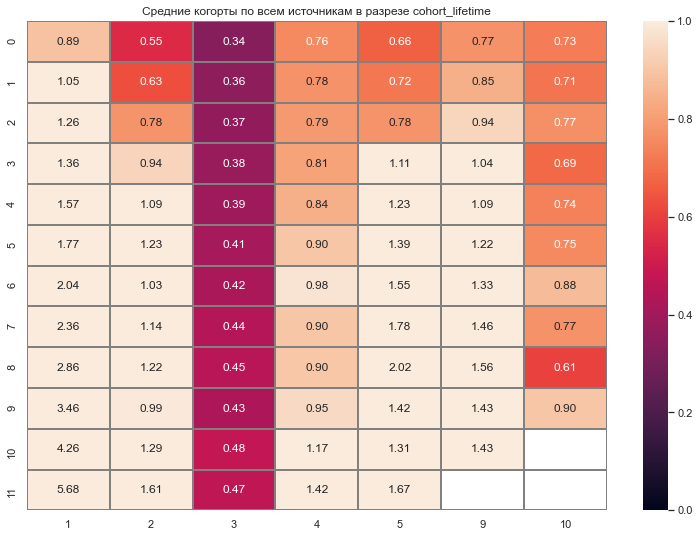

In [123]:
mean_cohort_romi
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Средние когорты по всем источникам в разрезе cohort_lifetime')
plt.xlabel('Источники')
plt.ylabel('cohort_lifetime')
sns.heatmap(mean_cohort_romi, annot=True, fmt='.2f', linewidths=1, linecolor='gray', vmin = 0, vmax = 1)
plt.show()

In [124]:
orders.groupby('source_id')['uid'].nunique() # количество привлеченных покупателей по источникам

source_id
1      2899
2      3506
3     10473
4     10295
5      6931
7         1
9      1088
10     1329
Name: uid, dtype: int64

In [125]:
expenses.groupby('source_id')['costs'].sum() # сумма затрат по источникам

source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64

In [126]:
orders.groupby('source_id')['revenue'].sum() # revenue по источникам

source_id
1     31090.55
2     46923.61
3     54511.24
4     56693.41
5     52624.02
7         1.22
9      5759.40
10     4450.33
Name: revenue, dtype: float64

Быстрее всего окупилась средняя когорта по 1 источнику (2 месяц), не окупились за период средние когорты по источникам 3 и 10.

**Вывод по 2.3**

Средний CAC равен 9.  
Дороже всего обходятся клиенты с истоников трафика 2 и 3.  
Больше всего денег тратится на рекламный истоник №3.Меньше всего затрат летом.  
Быстрее всего окупилась средняя когорта по 1 источнику (2 месяц), не окупились за период средние когорты по источникам 3 и 10.

## Выводы и рекомендации

### Определим источники трафика, на которые маркетологам стоит делать упор. Объясним свой выбор: на какие метрики вы ориентируетесь и почему.

Делать упор на истоники трафика 1,5,9 (т.к. вложения в эти источники в среднем окупились за 2-4 месяца). Уменьшить затраты на истоники 3 и 10 (средние когорты не окупились за представленный период).

### Опишем выводы, которые сделаны после подсчёта метрик каждого вида: маркетинговых, продуктовых и метрик электронной коммерции.

Retention Rate по всем когортам очень низкий, более 90 % пользователей сайта не возращается. Retention второго месяца находится в интервале от 4,2 до 8,5% по всем когортам и в следующие месяцы идет на спад. В среднем один пользователь заходит на сайт один раз в день, средняя продолжительность сессии (asl) - 1 минута (очень мало).  
Нобходимо обратить внимание на пики и провалы на графике DAU (24 ноября 2017 года было 3319 пользователя при среднем 907, а 31 марта 2018 года 1 пользователь).

У большей части пользователей на оформление заказа уходит не более 5 минут, в среднем за 6 месяцев каждый клиент делает 2 покупки со средним чеком 5,64. 
Дороже всего обходятся клиенты с истоников трафика 2 и 3.  
Больше всего денег тратится на рекламный истоник 3, который не окупился.


### Подведём итоги когортного анализа. Определим самые перспективные для компании когорты клиентов.

Можно выделить первую когорту, пользователи которой первый раз посетили сайт в июне 2017 (выше Retention).Также выделяются когорты по первым покупкам 2017-06-01 и 2017-09-01 (более высокий LTV). Необходимо обратить внимание на когорты по первым покупкам 2017-09-01, 2017-12-01 (в них есть более высокие средние чеки).